In [109]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import make_scorer, accuracy_score

In [118]:
#Read file
data = pd.read_csv("clean_data3.csv")

In [119]:
print(data.shape)
data.head()

(5904, 14)


,Unnamed: 0,molecule_chembl_id,smiles,standard_type,standard_value,standard_units,MW,LogP,NumHDonors,NumHAcceptors,AR,RB,bioactivity_class,bioactivity_class_encoded
0,0,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,Ki,33.0,nM,295.810,2.8477,0.0,3.0,1.0,2.0,active,0
1,1,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,Ki,314.0,nM,295.810,2.8477,0.0,3.0,1.0,2.0,inactive,1
2,2,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,Ki,32.0,nM,303.358,1.8677,0.0,5.0,1.0,3.0,active,0
3,3,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,Ki,388.0,nM,303.358,1.8677,0.0,5.0,1.0,3.0,inactive,1
4,4,CHEMBL333280,CN1CCC(O)(c2ccc(Cl)c(Cl)c2)C([C@@H](O)c2ccc(Cl...,Ki,4140.0,nM,435.178,5.1731,2.0,3.0,2.0,3.0,inactive,1


In [120]:
data=data.drop('standard_units',axis=1)
data=data.drop('bioactivity_class',axis=1)
data.shape

(5904, 12)

In [126]:
#Split the data to predictor and attributes

X = data.iloc[:,4:11]
y = data.iloc[:,11]


In [127]:
X.head()

,standard_value,MW,LogP,NumHDonors,NumHAcceptors,AR,RB
0,33.0,295.810,2.8477,0.0,3.0,1.0,2.0
1,314.0,295.810,2.8477,0.0,3.0,1.0,2.0
2,32.0,303.358,1.8677,0.0,5.0,1.0,3.0
3,388.0,303.358,1.8677,0.0,5.0,1.0,3.0
4,4140.0,435.178,5.1731,2.0,3.0,2.0,3.0


In [128]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: bioactivity_class_encoded, dtype: int64

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [130]:
data.columns

Index(['Unnamed: 0', 'molecule_chembl_id', 'smiles', 'standard_type',
       'standard_value', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'AR',
       'RB', 'bioactivity_class_encoded'],
      dtype='object')

In [132]:
#Clustering with kmeans
scaler = MinMaxScaler()
data_drop = data.drop(['Unnamed: 0', 'molecule_chembl_id', 'smiles', 'standard_type', 'bioactivity_class_encoded'], axis=1).columns
data_minmax = scaler.fit_transform(data[data_drop])
data_minmax = pd.DataFrame(data_minmax, columns=data[data_drop].columns)
data_minmax

,standard_value,MW,LogP,NumHDonors,NumHAcceptors,AR,RB
0,3.618378e-14,0.100314,0.648199,0.000000,0.071429,0.166667,0.06250
1,3.442942e-13,0.100314,0.648199,0.000000,0.071429,0.166667,0.06250
2,3.508730e-14,0.105028,0.606524,0.000000,0.119048,0.166667,0.09375
3,4.254335e-13,0.105028,0.606524,0.000000,0.119048,0.166667,0.09375
4,4.539420e-12,0.187366,0.747088,0.095238,0.071429,0.333333,0.09375
...,...,...,...,...,...,...,...
5899,1.096478e-14,0.186990,0.704044,0.047619,0.095238,0.333333,0.28125
5900,4.385913e-14,0.228510,0.705264,0.095238,0.119048,0.500000,0.28125
5901,2.741195e-14,0.160303,0.730576,0.095238,0.095238,0.333333,0.21875
5902,7.861749e-14,0.167540,0.616131,0.047619,0.142857,0.500000,0.09375


In [134]:
#convert to numpy arrays 
X= data_minmax.to_numpy()
y=data['bioactivity_class_encoded'].to_numpy()


<AxesSubplot: >

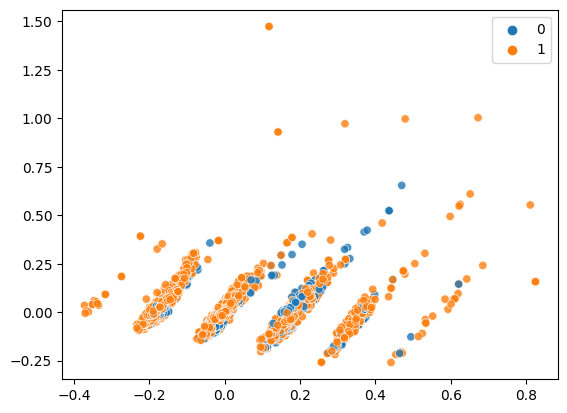

In [135]:

pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)

sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y,alpha=0.8)

In [136]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_pca)

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred
                            ))

              precision    recall  f1-score   support

           0       0.28      0.71      0.40      1665
           1       0.72      0.29      0.41      4239

    accuracy                           0.41      5904
   macro avg       0.50      0.50      0.41      5904
weighted avg       0.59      0.41      0.41      5904



In [138]:
kmeans.cluster_centers_

array([[-8.45394447e-02,  3.50869273e-03, -1.65446414e-03,
        -1.10970246e-03,  1.00287093e-03,  6.43730059e-06,
        -1.13759047e-04],
       [ 2.08716067e-01, -8.66247170e-03,  4.08464062e-03,
         2.73970020e-03, -2.47594808e-03, -1.58927950e-05,
         2.80855178e-04]])

In [139]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

In [140]:
kmeans.transform(X_pca[0:6,])

array([[0.1213993 , 0.40275561],
       [0.1213993 , 0.40275561],
       [0.13695986, 0.40219793],
       [0.13695986, 0.40219793],
       [0.14228592, 0.2229481 ],
       [0.13501712, 0.21965174]])

In [141]:
kmeans.inertia_

140.1448743798813

In [142]:
X_dist = kmeans.transform(X_pca)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

140.1448743798813

In [143]:
kmeans.score(X_pca)

-140.14487437988126

In [144]:
kmeans_rnd_init1 = KMeans(n_clusters=k, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=k, init="random", n_init=1,
                         algorithm="full", random_state=5)

In [145]:
y_rnd_init1 = kmeans_rnd_init1.fit_predict(X_pca)
y_rnd_init2 = kmeans_rnd_init2.fit_predict(X_pca)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [146]:
np.allclose(y_rnd_init1, y_rnd_init2)

False

In [147]:
kmeans_rnd_init1.inertia_

156.49183776870154

In [148]:
kmeans_rnd_init2.inertia_

140.14487437988126

In [149]:
kmeans_rnd_10_inits = KMeans(n_clusters=k, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X_pca)

kmeans_rnd_10_inits.inertia_  ##better than 1 init

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


140.1448743798813

In [150]:
#plot inertia
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_pca)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

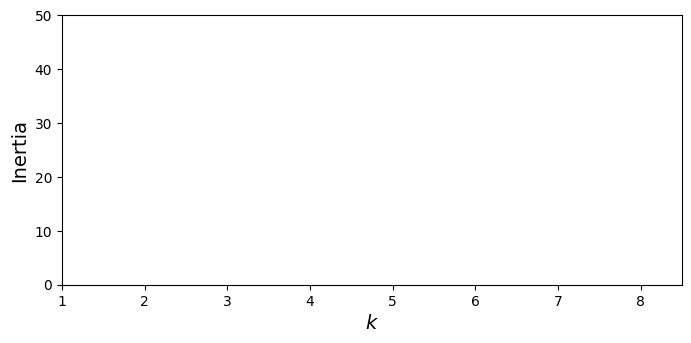

In [151]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 50])

plt.show()

In [152]:
#silhoutte
silhouette_score(X_pca, kmeans.labels_)

0.4528217476271283

In [153]:
silhouette_scores = [silhouette_score(X_pca, model.labels_)
                     for model in kmeans_per_k[1:]]

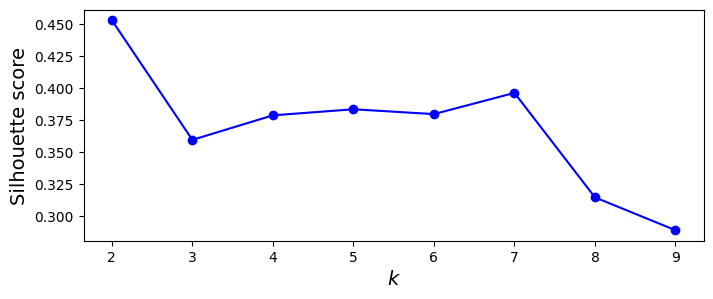

In [154]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

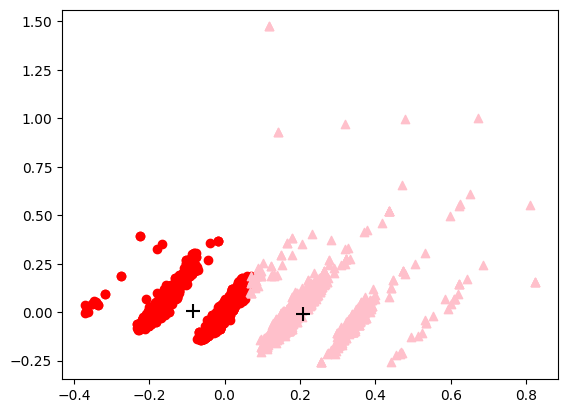

In [155]:
#visualise clusters, centroids, areas
#filter rows of original data
filtered_label0 = X_pca[y_pred == 0]
filtered_label1 = X_pca[y_pred == 1]
filtered_label2 = X_pca[y_pred == 2]

centroids = kmeans.cluster_centers_
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'pink',marker='^')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')

plt.scatter(centroids[:,0] , centroids[:,1] , s = 100,marker='+', color = 'black')
plt.show()


Text(0, 0.5, 'Average Cluster distance')

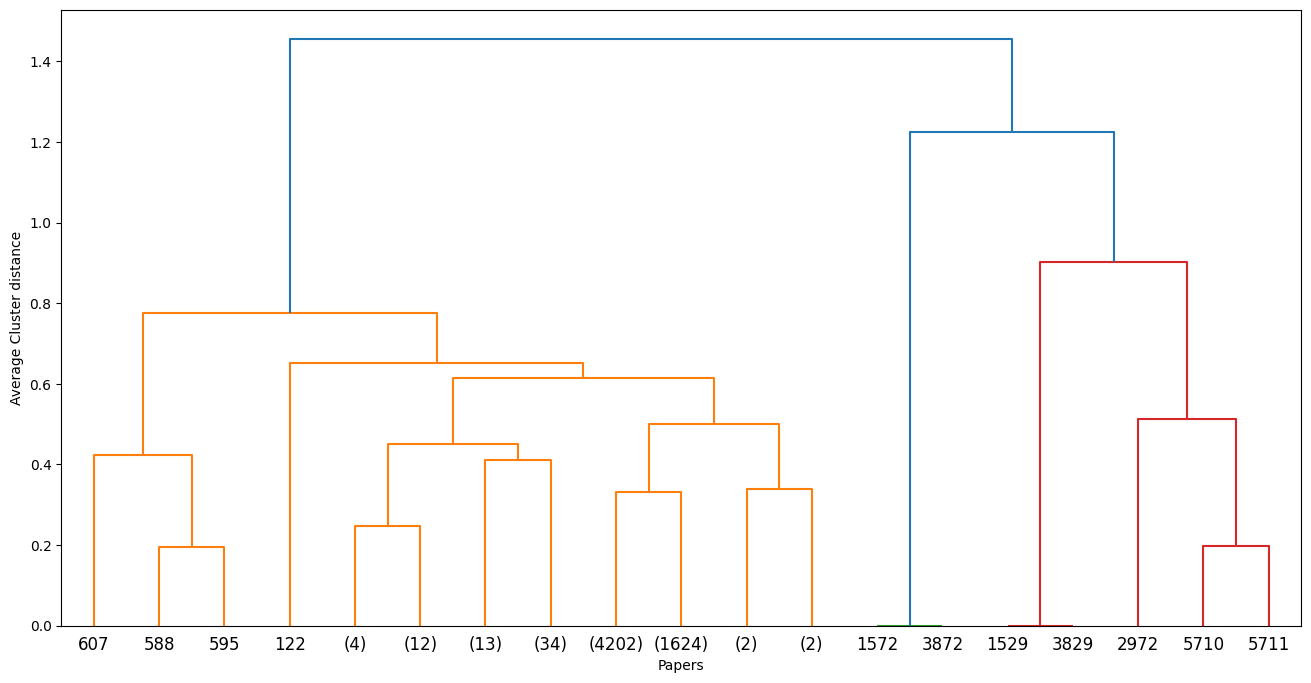

In [156]:
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
linkage_array = linkage(X_pca,method='average',metric='euclidean')
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters


plt.figure(figsize=(16, 8))

dendrogram(linkage_array,truncate_mode="level",p=5)
# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

plt.xlabel("Papers")
plt.ylabel("Average Cluster distance")

In [157]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred
                            ))

              precision    recall  f1-score   support

           0       0.28      0.71      0.40      1665
           1       0.72      0.29      0.41      4239

    accuracy                           0.41      5904
   macro avg       0.50      0.50      0.41      5904
weighted avg       0.59      0.41      0.41      5904

